In [51]:
import pandas as pd

In [52]:
data = pd.read_csv(r"stores_sales_forecasting.csv", encoding='latin-1')

In [53]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [54]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [55]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [56]:
time_series = data.groupby(pd.Grouper(key='Order Date', freq='ME'))['Sales'].sum()

In [57]:
time_series = time_series.asfreq('ME', fill_value=0)

In [58]:
time_series = pd.to_numeric(time_series, errors='coerce')

In [59]:
time_series = time_series.ffill()

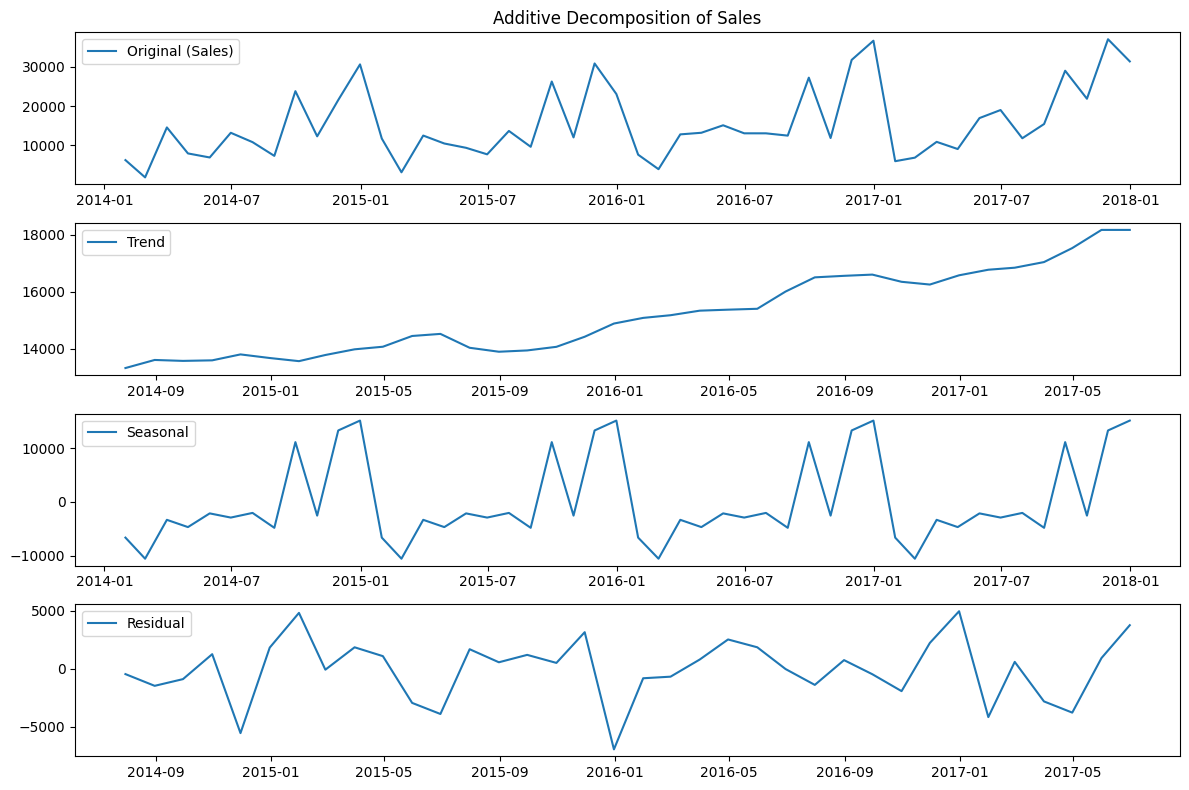

Additive decomposition plot saved as additive_sales_decomposition.png


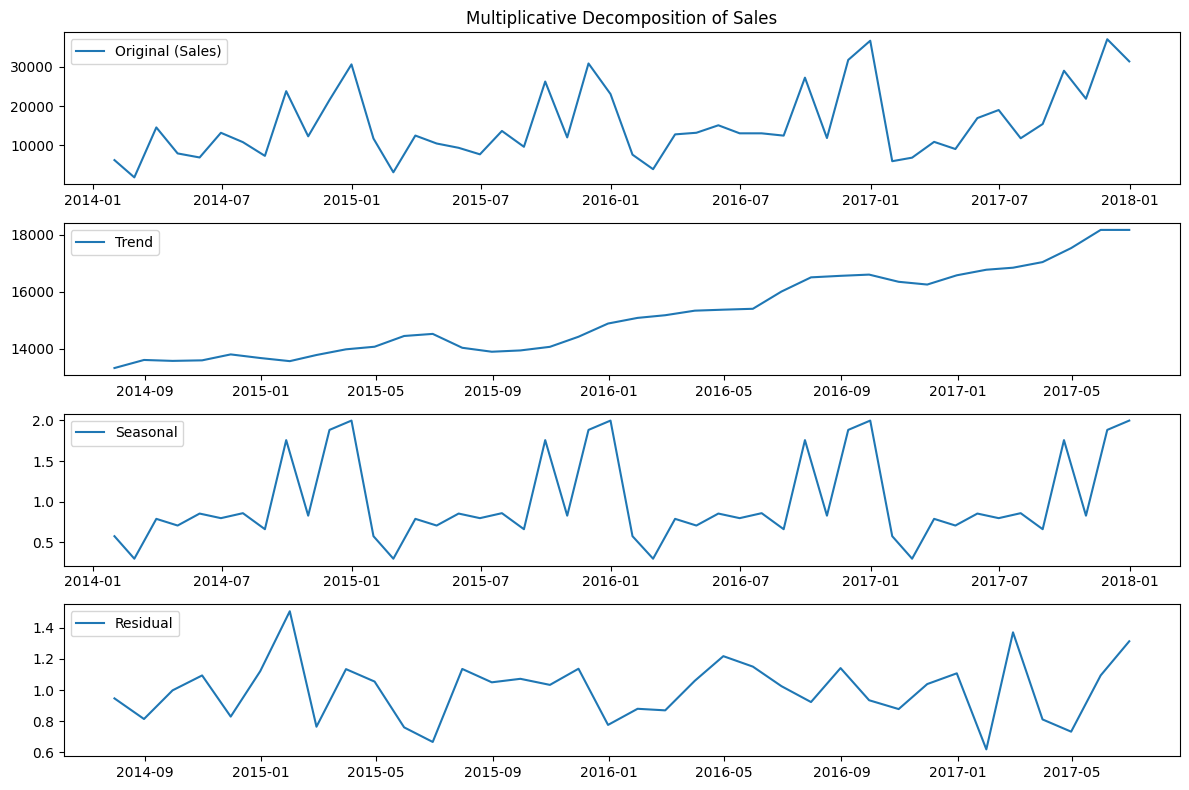

Multiplicative decomposition plot saved as multiplicative_sales_decomposition.png


In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def decompose_time_series(series, model_type='additive', period=12):
    try:
        # Perform decomposition
        decomposition = seasonal_decompose(series, model=model_type, period=period)
        
        # Extract components
        trend = decomposition.trend
        seasonal = decomposition.seasonal
        residual = decomposition.resid
        
        # Plot the decomposition
        plt.figure(figsize=(12, 8))
        
        plt.subplot(411)
        plt.plot(series, label='Original (Sales)')
        plt.legend(loc='upper left')
        plt.title(f'{model_type.capitalize()} Decomposition of Sales')
        
        plt.subplot(412)
        plt.plot(trend, label='Trend')
        plt.legend(loc='upper left')
        
        plt.subplot(413)
        plt.plot(seasonal, label='Seasonal')
        plt.legend(loc='upper left')
        
        plt.subplot(414)
        plt.plot(residual, label='Residual')
        plt.legend(loc='upper left')
        
        plt.tight_layout()
        plt.show()
        
        plt.close()
        
        print(f"{model_type.capitalize()} decomposition plot saved as {model_type}_sales_decomposition.png")
        
        return decomposition
    except ValueError as e:
        print(f"Error during {model_type} decomposition: {e}")
        print("Ensure the period is appropriate and data has enough observations.")
        return None

period = 12

additive_decomp = decompose_time_series(time_series, model_type='additive', period=period)

multiplicative_decomp = decompose_time_series(time_series, model_type='multiplicative', period=period)

In [61]:
# Forecast horizon (3 months)
horizon = 3

# Initialize forecast DataFrame
forecast_dates = pd.date_range(start=time_series.index[-1] + pd.offsets.MonthBegin(1), 
                              periods=horizon, freq='ME')
forecasts = pd.DataFrame(index=forecast_dates)

In [62]:
forecasts

""
2018-01-31
2018-02-28
2018-03-31


In [63]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

ses_model = SimpleExpSmoothing(time_series).fit(optimized=True)
des_model = Holt(time_series).fit(optimized=True)
tes_model = ExponentialSmoothing(time_series, trend='add', seasonal='add', seasonal_periods=12).fit(optimized=True)

forecasts['SES'] = ses_model.forecast(horizon)
forecasts['DES'] = des_model.forecast(horizon)
forecasts['TES'] = tes_model.forecast(horizon)

C:\Users\ajinf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ajinf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


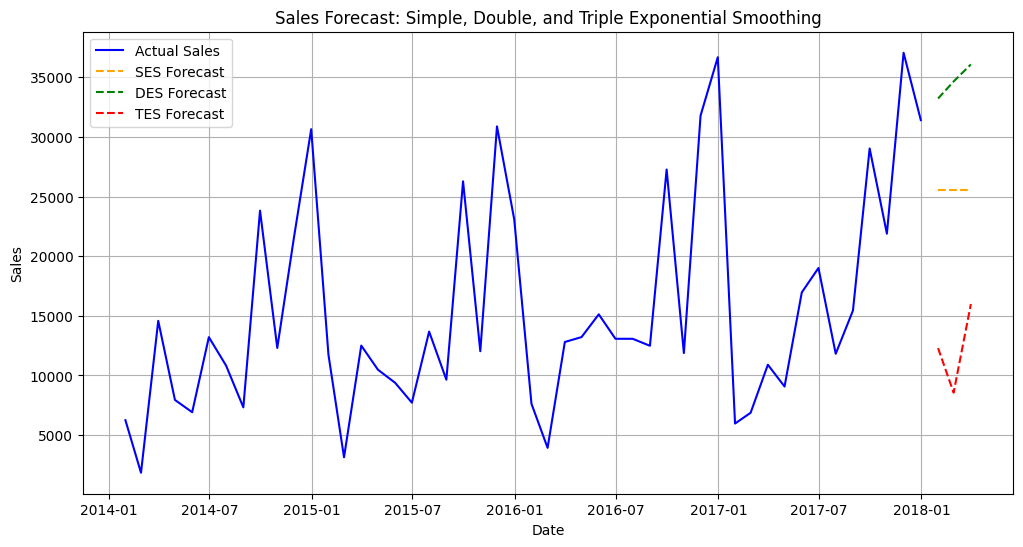

Forecast plot saved as sales_forecast_exponential_smoothing.png

Short-Term Sales Forecasts (Next 3 Months):
                 SES       DES       TES
2018-01-31  25526.76  33217.56  12288.00
2018-02-28  25526.76  34647.68   8554.16
2018-03-31  25526.76  36077.79  15985.16


In [64]:
# Plot actual and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series, label='Actual Sales', color='blue')
plt.plot(forecasts.index, forecasts['SES'], label='SES Forecast', color='orange', linestyle='--')
plt.plot(forecasts.index, forecasts['DES'], label='DES Forecast', color='green', linestyle='--')
plt.plot(forecasts.index, forecasts['TES'], label='TES Forecast', color='red', linestyle='--')
plt.title('Sales Forecast: Simple, Double, and Triple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
plt.close()
print("Forecast plot saved as sales_forecast_exponential_smoothing.png")

# Print forecast results
print("\nShort-Term Sales Forecasts (Next 3 Months):")
print(forecasts.round(2))

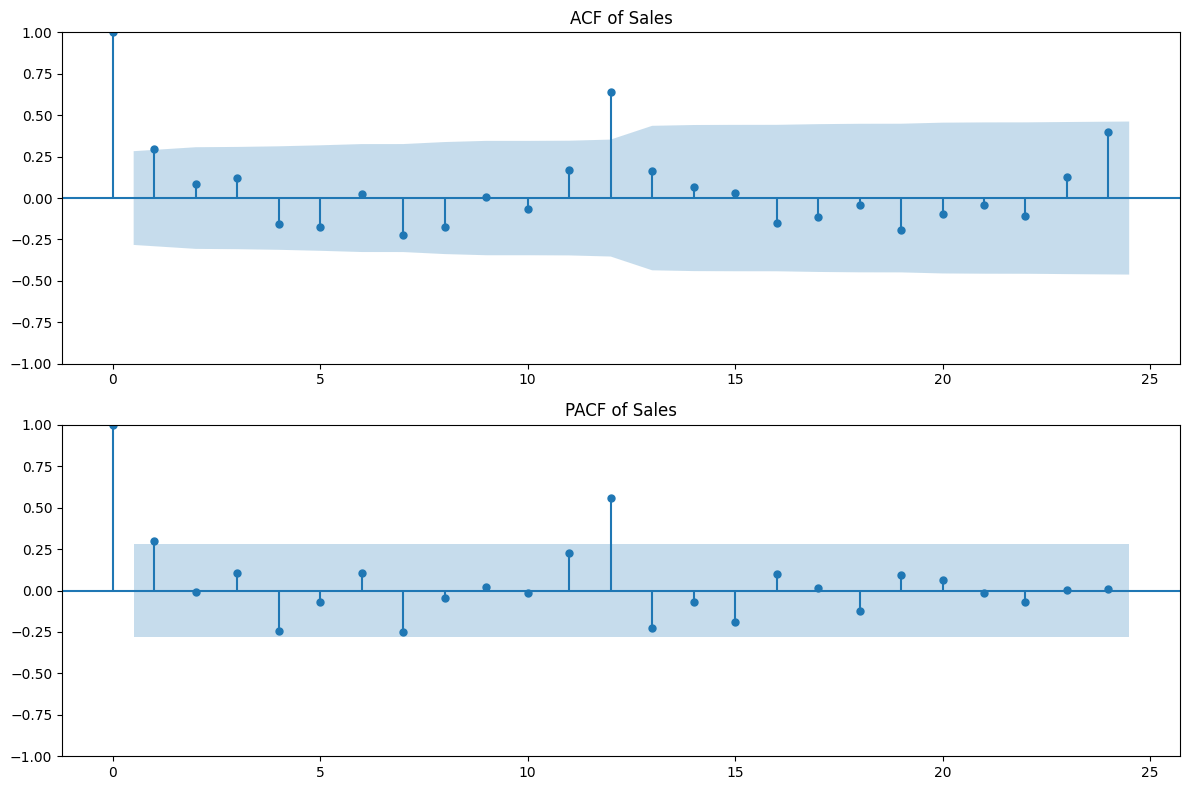

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 8))

# ACF
plt.subplot(211)
plot_acf(time_series, lags=min(40, len(time_series)//2), ax=plt.gca())
plt.title('ACF of Sales')

# PACF
plt.subplot(212)
plot_pacf(time_series, lags=min(40, len(time_series)//2), ax=plt.gca())
plt.title('PACF of Sales')

plt.tight_layout()
plt.show()
plt.close()

In [66]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_results = acorr_ljungbox(time_series, lags=min(40, len(time_series)//2), return_df=True)
print("Ljung-Box Test Results:")
print(lb_results)

Ljung-Box Test Results:
      lb_stat  lb_pvalue
1    4.492550   0.034043
2    4.849802   0.088487
3    5.627231   0.131224
4    6.917898   0.140291
5    8.576461   0.127198
6    8.611029   0.196664
7   11.569180   0.115647
8   13.372352   0.099664
9   13.375928   0.146321
10  13.653708   0.189381
11  15.560041   0.158266
12  42.854398   0.000024
13  44.685796   0.000024
14  45.028219   0.000040
15  45.091176   0.000074
16  46.807755   0.000073
17  47.776387   0.000093
18  47.933996   0.000154
19  50.928845   0.000096
20  51.683414   0.000127
21  51.834465   0.000202
22  52.950188   0.000231
23  54.541762   0.000226
24  70.580287   0.000002


In [67]:
type(lb_results)

pandas.core.frame.DataFrame

In [68]:
from scipy.stats import chi2

In [69]:
for lag, q_stat in zip(lb_results.index, lb_results.lb_stat):
    p_value = 1 - chi2.cdf(q_stat, df=lag)
    print(f"Lag {lag}: Q = {q_stat:.6f}, P-value = {p_value:.6f}")

Lag 1: Q = 4.492550, P-value = 0.034043
Lag 2: Q = 4.849802, P-value = 0.088487
Lag 3: Q = 5.627231, P-value = 0.131224
Lag 4: Q = 6.917898, P-value = 0.140291
Lag 5: Q = 8.576461, P-value = 0.127198
Lag 6: Q = 8.611029, P-value = 0.196664
Lag 7: Q = 11.569180, P-value = 0.115647
Lag 8: Q = 13.372352, P-value = 0.099664
Lag 9: Q = 13.375928, P-value = 0.146321
Lag 10: Q = 13.653708, P-value = 0.189381
Lag 11: Q = 15.560041, P-value = 0.158266
Lag 12: Q = 42.854398, P-value = 0.000024
Lag 13: Q = 44.685796, P-value = 0.000024
Lag 14: Q = 45.028219, P-value = 0.000040
Lag 15: Q = 45.091176, P-value = 0.000074
Lag 16: Q = 46.807755, P-value = 0.000073
Lag 17: Q = 47.776387, P-value = 0.000093
Lag 18: Q = 47.933996, P-value = 0.000154
Lag 19: Q = 50.928845, P-value = 0.000096
Lag 20: Q = 51.683414, P-value = 0.000127
Lag 21: Q = 51.834465, P-value = 0.000202
Lag 22: Q = 52.950188, P-value = 0.000231
Lag 23: Q = 54.541762, P-value = 0.000226
Lag 24: Q = 70.580287, P-value = 0.000002


In [70]:
# We get the P-value by calculating the 1 - Chi square for N with CDF

In [102]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Time of Day', 'Holiday'],
      dtype='object')

In [114]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(time_series)
print(f"ADF Statistic: {result[0]}, p-value: {result[1]}")

ADF Statistic: -4.699026242828901, p-value: 8.450793985809693e-05


In [119]:
from statsmodels.tsa.arima.model import ARIMA

best_aic = float('inf')
best_order = None
best_model = None
d = 1

for p in range(0, 4):
    for q in range(0, 4):
        model = ARIMA(time_series, order=(p, d, q)).fit()
        print(f"ARIMA({p},{d},{q}) - AIC:{model.aic} BIC:{model.bic}")
        if model.aic < best_aic:
            best_aic = model.aic
            best_order = (p, d, q)
            best_model = model

ARIMA(0,1,0) - AIC:1005.373641264173 BIC:1007.2237888658831
ARIMA(0,1,1) - AIC:994.2446376692202 BIC:997.9449328726403
ARIMA(0,1,2) - AIC:994.8502225261637 BIC:1000.4006653312939
ARIMA(0,1,3) - AIC:997.0404556836068 BIC:1004.441046090447
ARIMA(1,1,0) - AIC:999.1166037056392 BIC:1002.8168989090593
ARIMA(1,1,1) - AIC:994.7447798905674 BIC:1000.2952226956976
ARIMA(1,1,2) - AIC:996.5084692349537 BIC:1003.909059641794
ARIMA(1,1,3) - AIC:998.7795775991752 BIC:1008.0303156077256
ARIMA(2,1,0) - AIC:996.3001515631214 BIC:1001.8505943682516
ARIMA(2,1,1) - AIC:998.3130305829334 BIC:1005.7136209897736
ARIMA(2,1,2) - AIC:997.2772233018097 BIC:1006.5279613103601


C:\Users\ajinf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ajinf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ajinf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2,1,3) - AIC:994.1556654738505 BIC:1005.2565510841108
ARIMA(3,1,0) - AIC:998.2959112605791 BIC:1005.6965016674194
ARIMA(3,1,1) - AIC:997.7948914850685 BIC:1007.0456294936189
ARIMA(3,1,2) - AIC:999.1398078198692 BIC:1010.2406934301296
ARIMA(3,1,3) - AIC:993.2956661792405 BIC:1006.2466993912109


C:\Users\ajinf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [120]:
forecast = best_model.forecast(steps=10)
print(forecast)

2018-01-31    20107.816485
2018-02-28    26046.855746
2018-03-31    24005.848952
2018-04-30    16814.498245
2018-05-31    24703.430307
2018-06-30    22807.662425
2018-07-31    16558.721434
2018-08-31    24785.927983
2018-09-30    22309.915014
2018-10-31    16674.669580
Freq: ME, Name: predicted_mean, dtype: float64


In [ ]:
# This is idea on how we calculate the coefficients for AR and MA in ARIMA.

In [134]:
best_phi, best_theta = 0, 0
min_sse = float('inf')

for phi_test in np.arange(-1.0, 1.0, 0.1):
    for theta_test in np.arange(-1.0, 1.0, 0.1):
        # print(phi_test, theta_test)
        eps_hat = [0]
        sse = 0
        for t in range(1, len(y)):
            y_hat = phi_test * y[t-1] + theta_test * eps_hat[t-1]
            eps_t = y[t] - y_hat
            eps_hat.append(eps_t)
            sse += eps_t ** 2
        if sse < min_sse:
            min_sse = sse
            best_phi = phi_test
            best_theta = theta_test

print(f"Estimated φ: {best_phi}, θ: {best_theta}, SSE: {min_sse:.2f}")

Estimated φ (AR coefficient): 0.8469
Estimated θ (MA coefficient): 0.8318
